# MNIST Fashion Classification with Convolutional Neural Networks

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set() # for getting all plots in seaborn style
%matplotlib inline

## Importing Dataset

In [2]:
train_fashion_df = pd.read_csv('fashion-mnist_train.csv', sep=',')
test_fashion_df = pd.read_csv('fashion-mnist_test.csv', sep=',')

## Get some insight of data

In [9]:
#Let's look at the data and get some insight of it
train_fashion_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train_fashion_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Let's look at the shape of train and test dataframes
print('Train shape: ',train_fashion_df.shape)
print('Test shape: ',test_fashion_df.shape)

Train shape:  (60000, 785)
Test shape:  (10000, 785)


In [12]:
# Now we're gonna make an array of our dataset
train = np.array(train_fashion_df, dtype='float32')
test = np.array(test_fashion_df, dtype='float32')

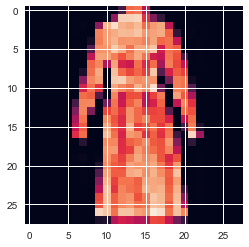

3.0


In [35]:
# Now take a look at some sample image
'''
Oh! remember our pictures are 28 by 28 pixels and in order to show them we should
re-shape them, now take look how we reshape the images
'''
import random
i = random.randint(1, 60000)
plt.imshow(train[i, 1:].reshape(28, 28))
plt.show()
label = train[i, 0]
print(label)

***Nice! as you can see there are 10 label for images, like 3 for dresses***

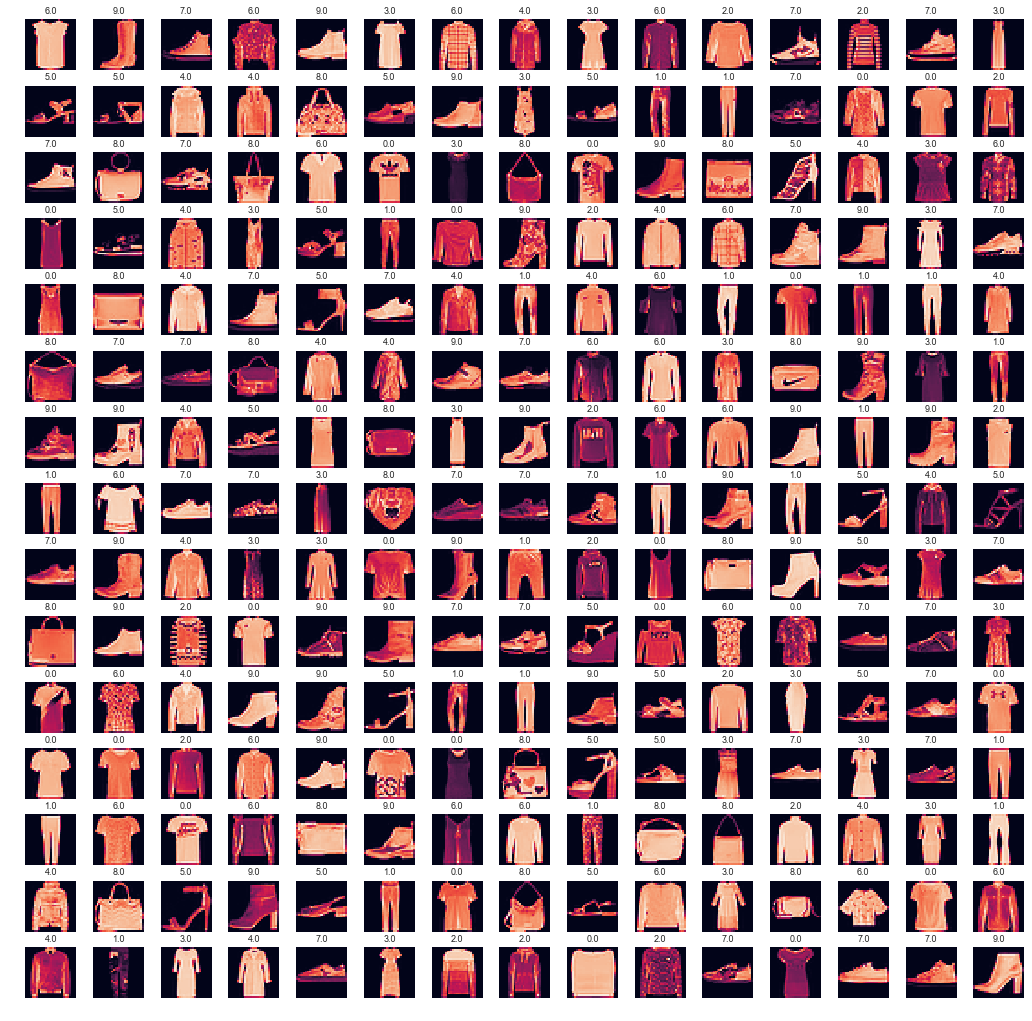

In [36]:
# Now let's see more images in a grid album :-)
W_grid = 15
L_grid = 15

f, ax = plt.subplots(L_grid, W_grid, figsize=(18, 18))
ax = ax.ravel() # Flatten the 15X15 matrix to 225 array
n_train = len(train)

# Select a random number from zero to n
for i in np.arange(0, W_grid*L_grid):
    # select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with selected random index
    ax[i].imshow(train[index, 1:].reshape(28, 28))
    ax[i].set_title(train[index, 0], fontsize=9)
    ax[i].axis('off')

plt.subplots_adjust(hspace=0.3)

In [37]:
# Splitting dataset:
# Train-set
X_train = train[:, 1:]/255
y_train = train[:, 0]
# Test-set
X_test = test[:, 1:]/255
y_test = test[:, 0]

In [38]:
# Now Let's a validation dataset
from sklearn.model_selection import train_test_split
X_train,X_validate,y_train,y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [39]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [41]:
# Let's take look at the shape:
print(X_train.shape)
print(X_test.shape)
print(X_validate.shape)

(48000, 28, 28, 1)
(10000, 28, 28, 1)
(12000, 28, 28, 1)


In [42]:
# Let's jump to neural net part
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [43]:
# Now Let's make our AWESOME CNN Model!!!
cnn_model = Sequential()

In [44]:
cnn_model.add(Conv2D(32, 3, 3, input_shape=(28, 28, 1), activation='relu'))

/home/sparda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [45]:
# Let's make MaxPooling layer
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

In [46]:
# time for Flatten layer
cnn_model.add(Flatten())

In [48]:
# Then Hidden and Output layer
cnn_model.add(Dense(output_dim=32, activation='relu'))
cnn_model.add(Dense(output_dim=10, activation='sigmoid'))

/home/sparda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  
/home/sparda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
# Compiling the model
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [50]:
epochs=50
cnn_model.fit(X_train,
             y_train,
             batch_size=512,
             nb_epoch=epochs,
             verbose=1,
             validation_data=(X_validate, y_validate))

/home/sparda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 30s 630us/step - loss: 2.0201 - acc: 0.4659 - val_loss: 1.7133 - val_acc: 0.6788
Epoch 2/50
48000/48000 [==============================] - 30s 625us/step - loss: 1.2825 - acc: 0.7426 - val_loss: 0.9133 - val_acc: 0.7877
Epoch 3/50
48000/48000 [==============================] - 28s 591us/step - loss: 0.7165 - acc: 0.8163 - val_loss: 0.5834 - val_acc: 0.8413
Epoch 4/50
48000/48000 [==============================] - 34s 717us/step - loss: 0.5085 - acc: 0.8519 - val_loss: 0.4631 - val_acc: 0.8558
Epoch 5/50
48000/48000 [==============================] - 44s 922us/step - loss: 0.4235 - acc: 0.8676 - val_loss: 0.4120 - val_acc: 0.8656
Epoch 6/50
48000/48000 [==============================] - 43s 891us/step - loss: 0.3757 - acc: 0.8775 - val_loss: 0.3639 - val_acc: 0.8798
Epoch 7/50
48000/48000 [==============================] - 43s 897us/step - loss: 0.3373 - acc: 0.8895 - val_loss: 0.

## Evaluating The Model

In [55]:
evaluation = cnn_model.evaluate(X_test, y_test)
print("Test accuracy: {:.3f}".format(evaluation[1]))

10000/10000 [==============================] - 2s 211us/step
Test accuracy: 0.914


In [56]:
predicted_classes = cnn_model.predict_classes(X_test)

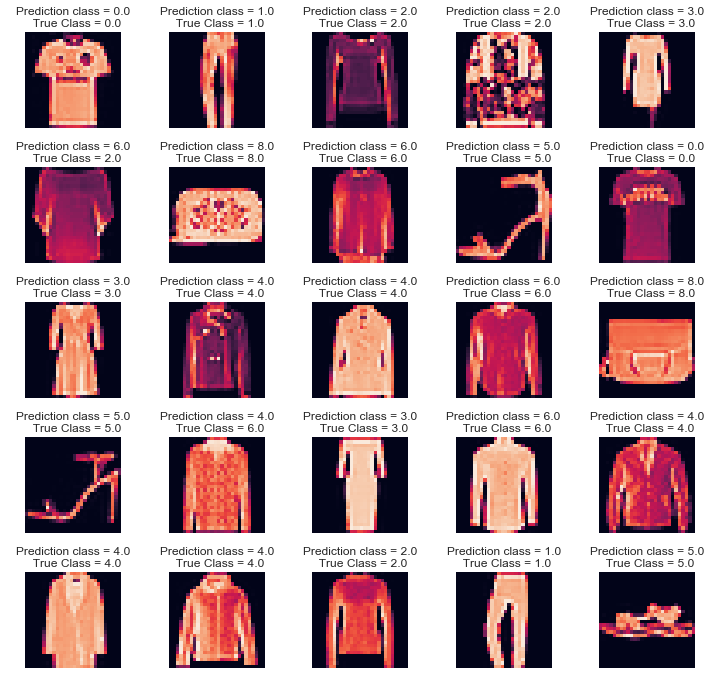

In [58]:
l=5
w=5
f, ax = plt.subplots(l, w, figsize=(12,12))
ax = ax.ravel()

for i in np.arange(0, l*w):
    ax[i].imshow(X_test[i].reshape(28, 28))
    ax[i].set_title("Prediction class = {:0.1f}\n  True Class = {:0.1f}".format(predicted_classes[i],y_test[i]))
    ax[i].axis('off')
    
plt.subplots_adjust(wspace=0.5)

Classification Report:

              precision    recall  f1-score   support

    Class 0       0.86      0.87      0.87      1000
    Class 1       0.98      0.98      0.98      1000
    Class 2       0.86      0.87      0.86      1000
    Class 3       0.91      0.92      0.91      1000
    Class 4       0.87      0.90      0.88      1000
    Class 5       0.98      0.96      0.97      1000
    Class 6       0.80      0.74      0.77      1000
    Class 7       0.95      0.96      0.95      1000
    Class 8       0.98      0.97      0.98      1000
    Class 9       0.95      0.97      0.96      1000

avg / total       0.91      0.91      0.91     10000



Confusion Matrix:



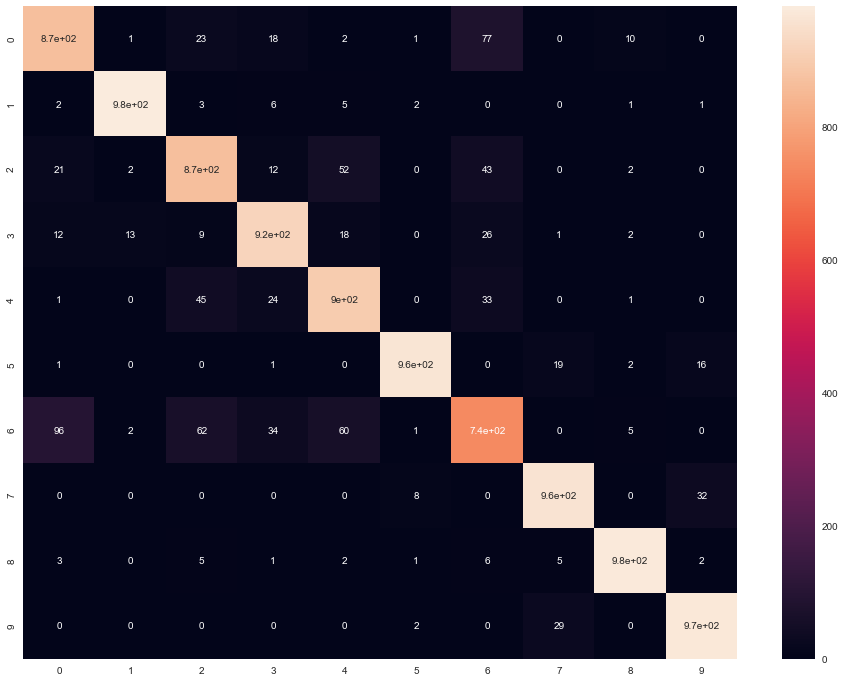

In [63]:
# Let's check out the confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(16,12))
numOfClasses = 10
target_names = ["Class {}".format(i) for i in range(numOfClasses)]
print('Classification Report:\n\n', classification_report(y_test, predicted_classes, target_names=target_names))
print('\n\nConfusion Matrix:\n')
sns.heatmap(cm, annot=True)
plt.show()

## For Tuning and Improving Model..

### 1. Increasing number of kernels ( Feature detector ) ;  use 64 instead 32 or maybe 128!!
### 2. Dropout ( for more generalizing model )
### 3.  Use another activation function for output layer

# FIN